In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


Title: Predicting Corporate Fraud Risks

This project aims to predict a firm's potential for fraudulent behavior by analyzing both current and historical risk factors. Our goal is to develop a robust model capable of distinguishing between firms likely to engage in fraudulent activity and those unlikely to do so, based on their past and present financial activities.

Fraud typically involves deceptive maneuvers such as the manipulation or misrepresentation of financial data to secure unlawful gains. To facilitate an accurate classification, we're using the Trial dataset, which offers a rich mix of current inherent risk factors and historical control risk factors.

In [2]:
set.seed(168)
read_csv("https://raw.githubusercontent.com/sgvjlee23/DSCI1002023SGroup6/main/trial.csv") -> trial
trial|>
    mutate (Risk = as_factor (Risk)) -> trial

Rows: 776 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): LOCATION_ID
dbl (17): Sector_score, PARA_A, SCORE_A, PARA_B, SCORE_B, TOTAL, numbers, Ma...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


We have read the dataset, "trial", from the web into R. Since the delimitter for this dataset is a comma, we have chosen the function, "read_csv", to load the dataset.

In [3]:
fraud_count <- trial |>
                group_by (Risk) |>
                summarize (count = n())
fraud_count

Risk,count
<fct>,<int>
0,290
1,486


Prior to spliting the dataset, we will first use the "group_by" and "summarize" functions to find out the proportion of the class we intend to classify, so that it can allow us to make sure the same proportions will be adopted in both training and testing dataset. And we have discovered that there are 217 firms that do not have the risk for fradulent acts, and there are 364 firms that do. In other words, 37% of the firms are non-fradulent, and 63% are.

Below, we have splited the dataset, "trial", into a training and testing dataset. And based on the summary table above, we have set prop = 0.63 since 63% of firms in the original dataset are classified as fraudelent.

In [4]:
trial_split <- initial_split(trial, prop = 0.63, strata = Risk)
trial_train <- training(trial_split)
trial_test <- testing(trial_split) 
glimpse(trial_train)

Rows: 488
Columns: 18
$ Sector_score  <dbl> 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.…
$ LOCATION_ID   <chr> "6", "6", "6", "8", "3", "4", "14", "5", "5", "5", "19",…
$ PARA_A        <dbl> 0.51, 0.00, 0.00, 0.00, 0.94, 0.00, 0.00, 0.00, 0.00, 0.…
$ SCORE_A       <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ PARA_B        <dbl> 0.23, 0.08, 0.83, 0.84, 0.01, 1.10, 1.03, 1.76, 2.97, 0.…
$ SCORE_B       <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ TOTAL         <dbl> 0.74, 0.08, 0.83, 0.84, 0.95, 1.10, 1.03, 1.76, 2.97, 0.…
$ numbers       <dbl> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,…
$ Marks         <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ Money_Value   <dbl> 0.000, 0.000, 2.950, 0.007, 0.100, 0.007, 0.000, 1.080, …
$ MONEY_Marks   <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ District      <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ Loss          <d

Based on this glimpse shot of the training dataset, it seems that it is already in a tidy format, and thus, the steps to cleaning and wrangling are unnecessary.

Prior to performing the actual data analysis, we will establish two tuning specification to identify the best K for optimal analysis, and to discover which predictors will be the most effective in classifying the fraudlent risk factors of firms accurately. For the first tuning specification, we have selected the inherent risk factors as predictors. And for the second one, we have selected control risk factors.

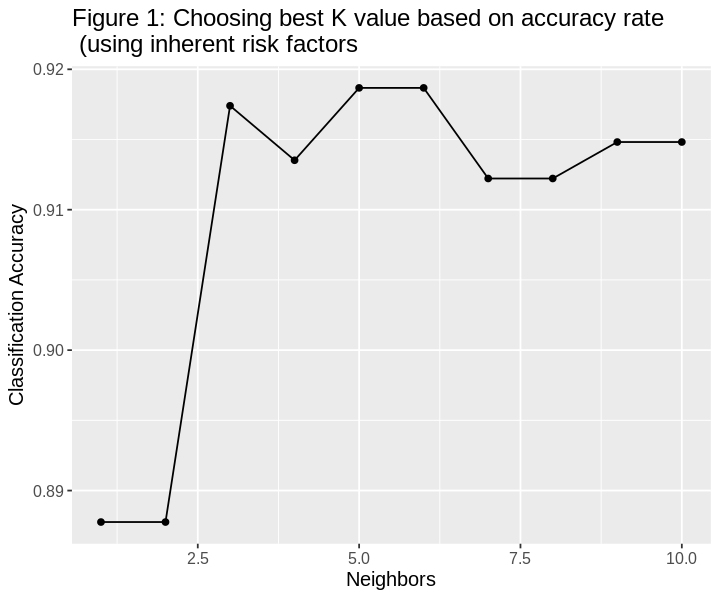

In [29]:
set.seed (111)
options(repr.plot.height = 5, repr.plot.width = 6)
if(any(is.na(trial)))
  trial <- na.omit(trial) 

training_recipe <- recipe (Risk ~ PARA_A + PARA_B + TOTAL + Money_Value, data = trial_train) |>
                    step_naomit(all_predictors()) |>  # Additional step to remove NA values
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

training_vfold <- vfold_cv(trial, v = 5, strata = Risk)

k_values <- tibble(neighbors = 1:10)

knn_results <- workflow() |>
                add_recipe(training_recipe) |>
                add_model(knn_tune) |>
                tune_grid(resamples = training_vfold, grid = k_values) |>
                collect_metrics()

accuracies <- knn_results |>
                filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean, group = .metric)) +
                    geom_point() +
                    geom_line() +
                    labs(x = "Neighbors", y = "Classification Accuracy") +
                    theme(text = element_text(size = 12))+
                    ggtitle ("Figure 1: Choosing best K value based on accuracy rate \n (using inherent risk factors")

cross_val_plot

For the tuning specification for inherent risk factors, data standardization forms the first step of our analysis. This ensures fairness and uniformity by aligning all variables to a comparable scale. Following this, we create a classification recipe, a preparatory step that outlines how we'll transform the data for modeling.

Subsequently, we establish a tuning specification to identify the optimal number of K-neighbors for our K-nearest neighbors (KNN) model, followed by the setting up of a 5-fold cross-validation process. This division of the dataset into five subsets helps us to independently train and test the model, improving its reliability and minimizing dependency on any particular data partition.

Next, we construct a KNN model specification fitted to the training data, which enables us to generate predictions based on established relationships within the dataset. We encapsulate our recipe, model specification, and cross-validation process into a tuning workflow, iteratively refining our model. Upon its completion, we collect all performance metrics to assess the model's accuracy.

Finally, we graphically represent the relationship between the model's accuracy rate and the number of K-neighbors using a combination of point and scatter plots. This visualization assists us in identifying the most effective K value: 5, since adjusting the value to a nearby one does not significantly diminish the model's accuracy, which ensures our selection is dependable amidst uncertainty. Moreover, the computational cost of training this dataset is not prohibitive. However, one thing to note is that one nearby K, 4, has a lower accuracy rate relatively to 3 and 6, this suggests that there might be a tie where the algorithm won't be able to make a decisive prediction because each class has equal votes.

On the other hand, based on the above visualization, we conclude that all predictors used in this tuning specfication are necessary to produce accurate results for the final data analysis, as it has allowed us to pick the best k.

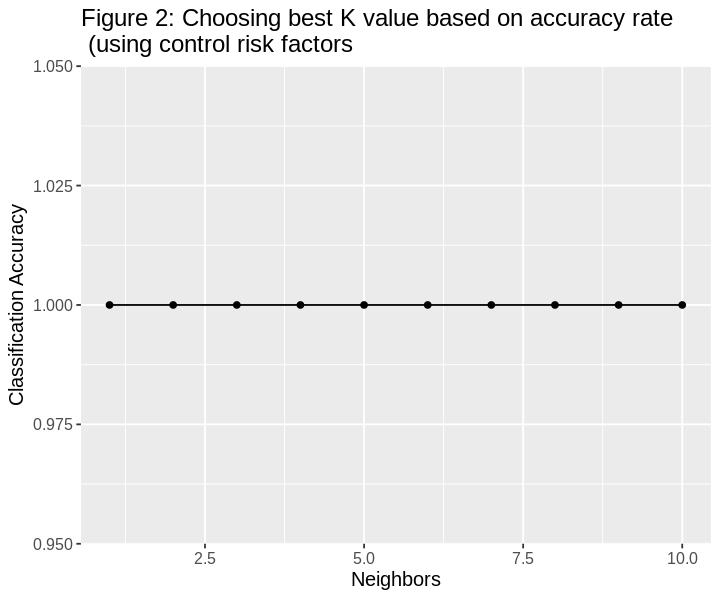

In [31]:
set.seed (99)
options(repr.plot.height = 5, repr.plot.width = 6)

training_recipe2 <- recipe (Risk ~ Score + History_score, data = trial_train)|>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())

knn_tune2 <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

training_vfold2 <- vfold_cv(trial, v = 5, strata = Risk)

k_values2 <- tibble(neighbors = 2:8)
knn_results2 <- workflow() |>
                add_recipe(training_recipe2) |>
                add_model(knn_tune2) |>
                tune_grid(resamples = training_vfold2, grid = k_values) |>
                collect_metrics()

accuracies2 <- knn_results2 |>
                filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies2, aes(x = neighbors, y = mean, group = .metric)) +
                    geom_point() +
                    geom_line() +
                    labs(x = "Neighbors", y = "Classification Accuracy") +
                    theme(text = element_text(size = 12)) +
                    ggtitle ("Figure 2: Choosing best K value based on accuracy rate \n (using control risk factors")
                    
cross_val_plot

The above visualization is the result of our second tuning specification. While it has seemingly produced a result that has a 100% accuracy rate in classification, we have decided not to utilize any of these predictors as they reflect outcomes that are derived from data previously processed by others. Therefore, while employing these predictors would result in perfect accuracy, we ultimately lack the mathematical model that can allow us to reproduce the results, which will thereby bar us from using these data in our final data analysis.

          Truth
Prediction   0   1
         0 101  19
         1   7 161

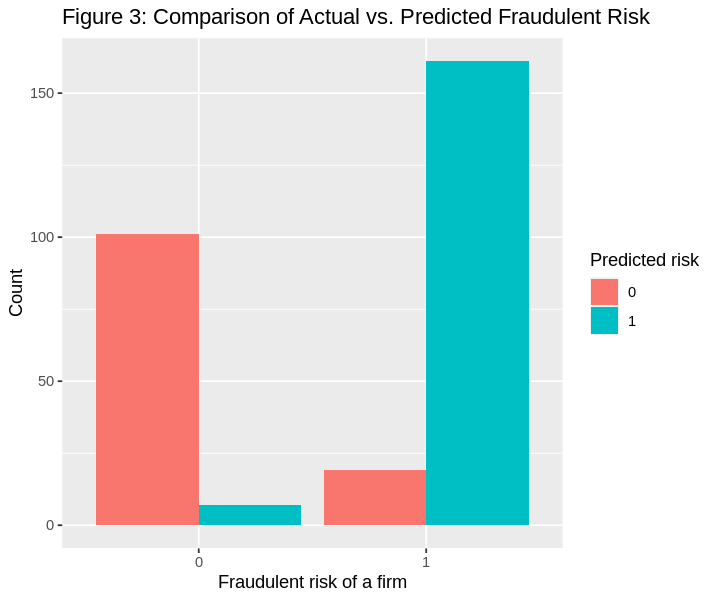

In [32]:
set.seed (199)
training_recipe <- recipe (Risk ~ PARA_A + PARA_B + TOTAL + Money_Value, data = trial_train) |>
                    step_naomit(all_predictors()) |>  # Additional step to remove NA values
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
            set_engine("kknn") |>
            set_mode("classification")

knn_fit <- workflow() |>
                add_recipe(training_recipe) |>
                add_model(knn_spec) |>
                fit (data = trial_train)

trial_test_predictions <- predict (knn_fit, trial_test)|>
                        bind_cols (trial_test)

trial_metrics <- trial_test_predictions |>
                metrics (truth = Risk, estimate = .pred_class) |>
                filter (.metric == "accuracy")

trial_conf_mat <- trial_test_predictions |>
                    conf_mat (truth = Risk, estimate = .pred_class)

trial_test_plot <- trial_test_predictions|>
                    ggplot(aes(x = Risk, fill = .pred_class)) +
                    geom_bar(position = 'dodge') +
                    labs(x = "Fraudulent risk of a firm", 
                         y = "Count", 
                         fill = "Predicted risk") +
                    ggtitle("Figure 3: Comparison of Actual vs. Predicted Fraudulent Risk")

trial_conf_mat
trial_test_plot